In [1]:
import mne
import numpy as np

## Info

In [2]:
n_channels = 32
sampling_freq = 200 # in Hz
info = mne.create_info(n_channels, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, ...
 chs: 32 MISC
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 32
 projs: []
 sfreq: 200.0 Hz
>


In [3]:
ch_names = [f'MEG{n:03}' for n in range(1, 10)] + ['EOG001']
ch_types = ['mag', 'grad', 'grad'] * 3 + ['eog']
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
print(info)

<Info | 7 non-empty values
 bads: []
 ch_names: MEG001, MEG002, MEG003, MEG004, MEG005, MEG006, MEG007, MEG008, ...
 chs: 3 MAG, 6 GRAD, 1 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 10
 projs: []
 sfreq: 200.0 Hz
>


In [4]:
ch_names = ['Fp1', 'Fp2', 'Fz', 'Cz', 'Pz', 'O1', 'O2']
ch_types = ['eeg'] * 7
info = mne.create_info(ch_names, ch_types=ch_types, sfreq=sampling_freq)
info.set_montage('standard_1020')
print(info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, Fz, Cz, Pz, O1, O2
 chs: 7 EEG
 custom_ref_applied: False
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 200.0 Hz
>


In [5]:
info['description'] = 'My custom dataset'
info['bads'] = ['O1']  # Names of bad channels
print(info)

<Info | 10 non-empty values
 bads: 1 items (O1)
 ch_names: Fp1, Fp2, Fz, Cz, Pz, O1, O2
 chs: 7 EEG
 custom_ref_applied: False
 description: My custom dataset
 dig: 10 items (3 Cardinal, 7 EEG)
 highpass: 0.0 Hz
 lowpass: 100.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 200.0 Hz
>


## Raw

Creating RawArray with float64 data, n_channels=2, n_times=200
    Range : 0 ... 199 =      0.000 ...     0.995 secs
Ready.


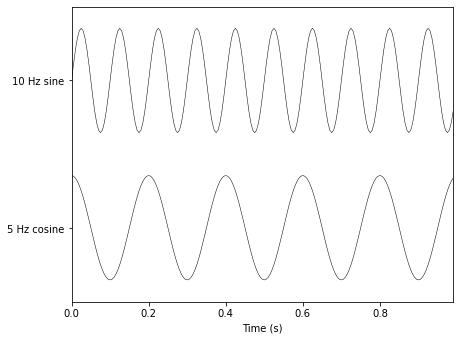

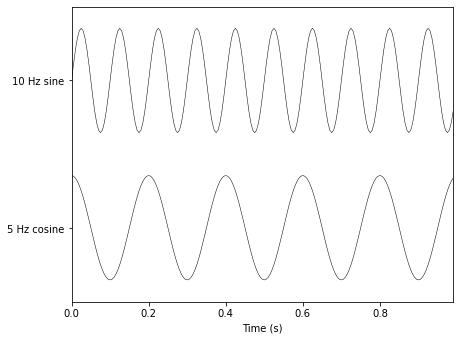

In [6]:
times = np.linspace(0, 1, sampling_freq, endpoint=False)
sine = np.sin(20 * np.pi * times)
cosine = np.cos(10 * np.pi * times)
data = np.array([sine, cosine])

info = mne.create_info(ch_names=['10 Hz sine', '5 Hz cosine'],
                       ch_types=['misc'] * 2,
                       sfreq=sampling_freq)
simulated_raw = mne.io.RawArray(data, info)
simulated_raw.plot(show_scrollbars=False, show_scalebars=False)